In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np
import random

# Q1

In [3]:
#lcg generator


global gseed, curr
gseed = 0
curr = 0
def myLCG(a, m, seed, c = 0, scale = 32768, sgn = 1): # takes seed, the +-range (scale) in which the numbers are to be generated and 'sgn'.
# By default, scale = RANDMAX
# 'sgn' decides whether negative random numbers will be generated.
  global gseed
  global curr
  if seed == gseed:
    # print("")
    seed = seed
  else:
    gseed = seed
    p = float(seed)
    curr = float(seed)

  # a = 1103515245 # multiplier
  # c = 12345 # increment
  # m = 32768 # modulus: RANDMAX

  # b: base - decides whether negative random numbers will be generated, based on input 'sgn'
  # By default 'sgn' = 1; the function generates only positive random numbers within specified range
  # If 'sgn' is negative, negative numbers are generated
  if sgn >= 0: b = 0
  else: b = 1

  curr = (a*curr + c)%m
  curr = ((-1)**(b*(int(curr))))*curr
  rez = (curr*scale)/m
  del(a)
  del(c)
  del(m)
  del(b)
  return(rez)

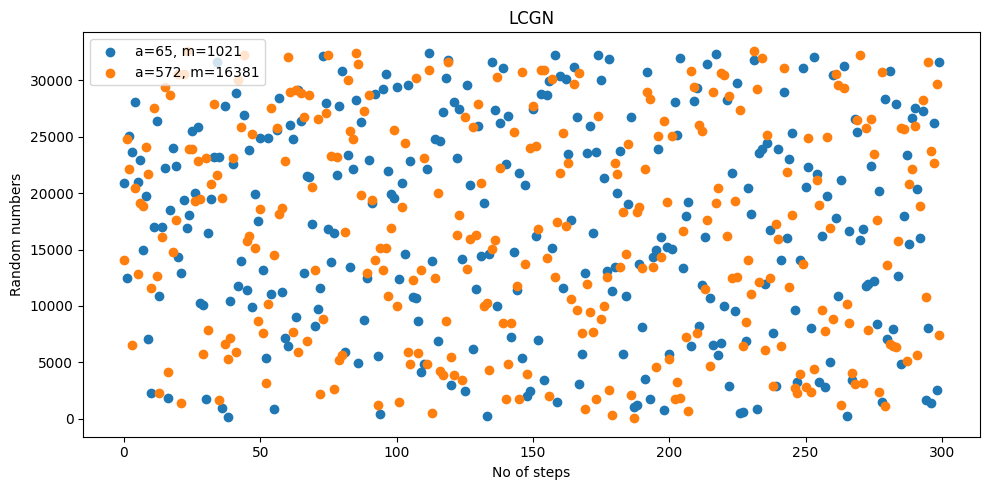

In [4]:
plt.figure(figsize=(10, 5))
L = 300

# First LCGN
a = 65
m = 1021
index = []
RN = []
for i in range(L):
    index.append(i)
    RN.append(myLCG(a, m, 10))
plt.scatter(index, RN, label='a=65, m=1021')

# Second LCGN
a = 572
m = 16381
index = []
RN = []
for i in range(L):
    index.append(i)
    RN.append(myLCG(a, m, 10))
plt.scatter(index, RN, label='a=572, m=16381')

plt.xlabel("No of steps")
plt.ylabel("Random numbers")
plt.title("LCGN")
plt.legend()  # Add legend
plt.tight_layout()
plt.show()

# Q2

In [5]:
#monte carlo functions
def F(fn,N,b,a,X):
    sum=0
    for i in range(N):
        sum=sum+fn(X[i])
    return (b-a)*sum/N

def monte_carlo(fn, a, b, N):
    e=0.00001
    X,y_plot=[],[]
    for i in range(N):
        X.append(a+(b-a)*np.random.uniform())
    F_N = F(fn, N, b, a, X)
    y_plot.append(F_N)
    return F_N

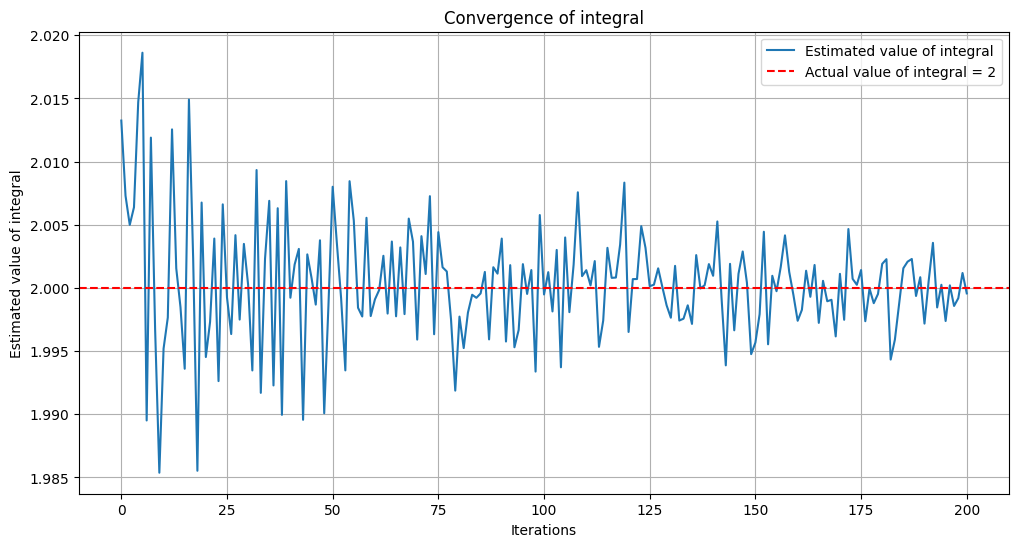

In [14]:
def fun(x):
    return math.cos(x)

limits = [-np.pi/2, np.pi/2]
A = []
# Er = []

for n in range(1000,201001,1000):
    ans = monte_carlo(fun, limits[0], limits[1], n)
    A.append(ans)
    # Er.append(SD)

plt.figure(figsize=(12, 6))
plt.plot(A,label="Estimated value of integral")

# plt.errorbar(range(1000,100000,1000), A, yerr=Er, fmt='-o', label="Estimated value of integral and its standard deviation")

plt.axhline(y=2, color='r', linestyle='--', label="Actual value of integral = 2")

plt.xlabel("Iterations")
plt.ylabel("Estimated value of integral")
plt.title("Convergence of integral")
plt.grid()
plt.legend()
plt.show()


# Q3

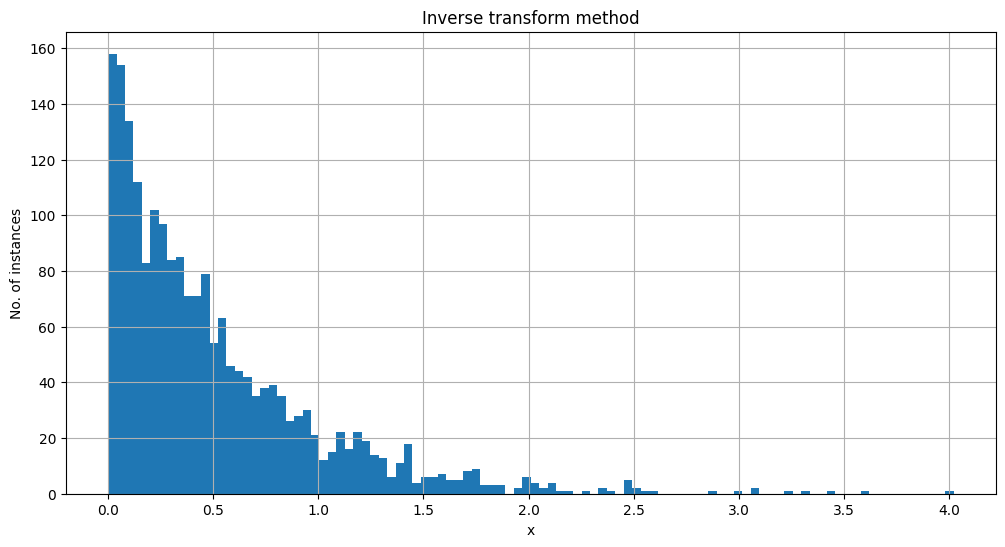

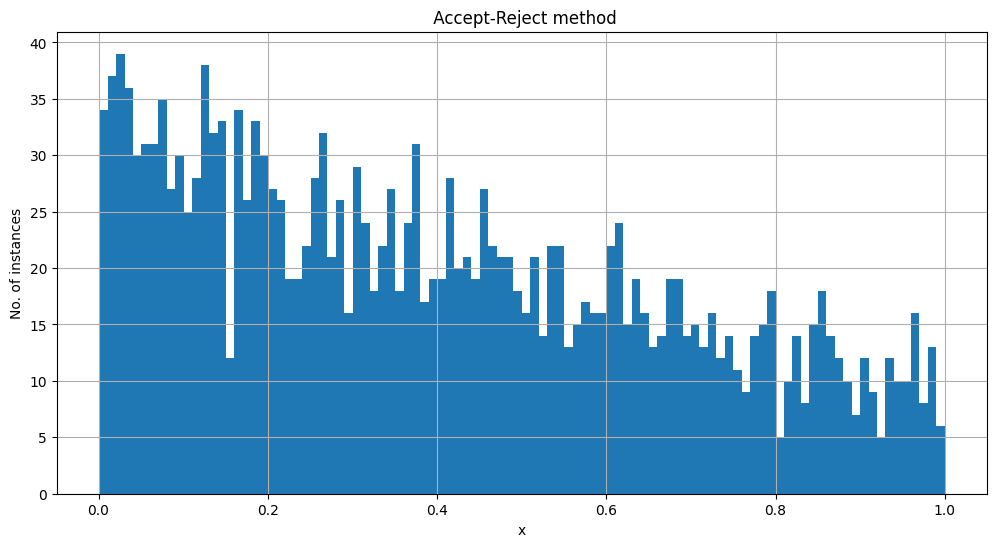

In [15]:
def inverseExponentialCDF(x):
    return -np.log(x) / 2

num_samples = 2000  # Number of samples
uniform_samples = np.random.uniform(0, 1, num_samples)  # Generating uniform distribution
exponential_samples = inverseExponentialCDF(uniform_samples)

plt.figure(figsize=(12, 6))
plt.hist(exponential_samples, bins=100)
plt.title('Inverse transform method')
plt.ylabel('No. of instances')
plt.xlabel('x')
plt.grid()
plt.show()

print("")
print("")

def sampling_PDF(x):
    return 2 - x

def target_PDF(x):
    return math.exp(-2 * x)

def acceptRejectSampling(num_samples):
    accepted_samples = []
    majorizing_constant = 4  # Majorizing constant for the sampling distribution
    while len(accepted_samples) < num_samples:
        x = np.random.uniform(0, 1)
        u = np.random.uniform(0, 1)
        if u <= target_PDF(x) / (majorizing_constant * sampling_PDF(x)):
            accepted_samples.append(x)
    return accepted_samples

accepted_samples = acceptRejectSampling(num_samples)

plt.figure(figsize=(12, 6))
plt.hist(accepted_samples, bins=100)
plt.ylabel('No. of instances')
plt.grid()
plt.xlabel('x')
plt.title(' Accept-Reject method')
plt.show()


# Q4

In [21]:
def IS_MonteCarlo(function, probability_distribution, num_samples, upper_limit, lower_limit):
    epsilon = 0.00001
    samples, result_values = [], []
    for i in range(num_samples):
        samples.append(lower_limit + (upper_limit - lower_limit) * (random.uniform(0, 1)))
    result = function(probability_distribution, num_samples, upper_limit, lower_limit, samples)
    result_values.append(result)
    return result

def Fun_1(probability_distribution, num_samples, upper_limit, lower_limit, samples):
    total_sum = 0
    for i in range(num_samples):
        total_sum += probability_distribution(samples[i]) / 0.5
    return total_sum / num_samples

def Fun_2(probability_distribution, num_samples, upper_limit, lower_limit, samples):
    total_sum = 0
    for i in range(num_samples):
        total_sum += probability_distribution(samples[i]) / math.exp(-1 * samples[i])
    return total_sum / num_samples

def Fun_3(probability_distribution, num_samples, upper_limit, lower_limit, samples):
    total_sum = 0
    for i in range(num_samples):
        total_sum += probability_distribution(samples[i]) / (math.exp(-1 * samples[i] / 2) / (2 * (1 - math.exp(-0.5))))
    return total_sum / num_samples

def question(x):
    return math.exp(-2 * x) / (1 + x ** 2)

upper_limit, lower_limit = 2, 0
num_samples = 10000
result_values = []

result_uniform_pdf = monte_carlo(question, lower_limit,upper_limit,num_samples)
result_pdf_half = IS_MonteCarlo(Fun_1, question, num_samples, upper_limit, lower_limit)
result_pdf_exp = IS_MonteCarlo(Fun_2, question, num_samples, upper_limit, lower_limit)
result_pdf_exp_half = IS_MonteCarlo(Fun_3, question, num_samples, upper_limit, lower_limit)

print("Actual integral value using uniform probability distribution:", result_uniform_pdf)
print("When p(x) = 0.5, integral value:", result_pdf_half)
print("When p(x) = exp(-x), integral value:", result_pdf_exp)
print("When p(x) = exp(-x/2)/[2(1-exp(-0.5))], integral value:", result_pdf_exp_half)
print()
print("Variance reduction is best acheived with p(x) = 0.5")

Actual integral value using uniform probability distribution: 0.3938723285208099
When p(x) = 0.5, integral value: 0.3924782140444287
When p(x) = exp(-x), integral value: 0.3006450801644193
When p(x) = exp(-x/2)/[2(1-exp(-0.5))], integral value: 0.190217516732148

Variance reduction is best acheived with p(x) = 0.5
